In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [2]:
df = pd.read_csv('/Users/nickthomas/projects/chess_project/data/games.csv')

# Chess Dataset

General Info

This is a set of just over 20,000 games collected from a selection of users on the site Lichess.org, and how to collect more. I will also upload more games in the future as I collect them. This set contains the:

    Game ID;
    Rated (T/F);
    Start Time;
    End Time;
    Number of Turns;
    Game Status;
    Winner;
    Time Increment;
    White Player ID;
    White Player Rating;
    Black Player ID;
    Black Player Rating;
    All Moves in Standard Chess Notation;
    Opening Eco (Standardised Code for any given opening, list here);
    Opening Name;
    Opening Ply (Number of moves in the opening phase)

For each of these separate games from Lichess. I collected this data using the Lichess API, which enables collection of any given users game history. The difficult part was collecting usernames to use, however the API also enables dumping of all users in a Lichess team. There are several teams on Lichess with over 1,500 players, so this proved an effective way to get users to collect games from.

Possible Uses

Lots of information is contained within a single chess game, let alone a full dataset of multiple games. It is primarily a game of patterns, and data science is all about detecting patterns in data, which is why chess has been one of the most invested in areas of AI in the past. This dataset collects all of the information available from 20,000 games and presents it in a format that is easy to process for analysis of, for example, what allows a player to win as black or white, how much meta (out-of-game) factors affect a game, the relationship between openings and victory for black and white and more.

In [3]:
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


## Question 1: Who wins more?

In [5]:
df.winner.value_counts()

white    10001
black     9107
draw       950
Name: winner, dtype: int64

In [6]:
print('White appears to win', round(10001 / 20058, 2) * 100, '% of the games')
print('while Black wins', round(9107 / 20058, 2) * 100, '% of the games')
print('and', round(950 / 20058, 2) * 100, '% of the games are a draw')

White appears to win 50.0 % of the games
while Black wins 45.0 % of the games
and 5.0 % of the games are a draw


It appears that White has a slight edge. So why would white have the edge? The obvious answer would be in who goes first. If that's the case, we should look at what openings are used.

## Question 2: Which opening correlates with the most wins?

In [7]:
open_df = df.groupby(by='opening_name').winner.value_counts()
open_df = open_df.reset_index(name='wins')
open_df = open_df.sort_values(by='wins', ascending=False)

In [8]:
black_wins = open_df[open_df['winner'] == 'black']
white_wins = open_df[open_df['winner'] == 'white']

In [9]:
print(black_wins.opening_name.nunique())
print(white_wins.opening_name.nunique())

1145
1181


In [10]:
black_wins.head()

,opening_name,winner,wins
2647,Van't Kruijs Opening,black,226
2189,Sicilian Defense,black,194
2220,Sicilian Defense: Bowdler Attack,black,164
2064,Scandinavian Defense,black,123
654,French Defense: Knight Variation,black,121


In [11]:
white_wins.head()

,opening_name,winner,wins
2095,Scandinavian Defense: Mieses-Kotroc Variation,white,164
2190,Sicilian Defense,white,149
2113,Scotch Game,white,145
653,French Defense: Knight Variation,white,135
1451,Philidor Defense #3,white,127


so we see the top 5 openings for black and white. So for each side, what is the win probability for each opening?

In [12]:
black_winner = list(black_wins.head().opening_name)
white_winner = list(white_wins.head().opening_name)
winner = black_winner + white_winner
dataframes = []
for x in winner:
    temp = open_df[open_df['opening_name'] == x]
    temp['sum'] = temp.wins.sum().astype(int)
    temp['percentage'] = temp['wins'] / temp['sum']
    dataframes.append(temp)
win_prob = dataframes[0]
for x in dataframes[1:]:
    win_prob = pd.concat([win_prob, x])

/Users/nickthomas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/nickthomas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, 'Percentage(Out of 1)')

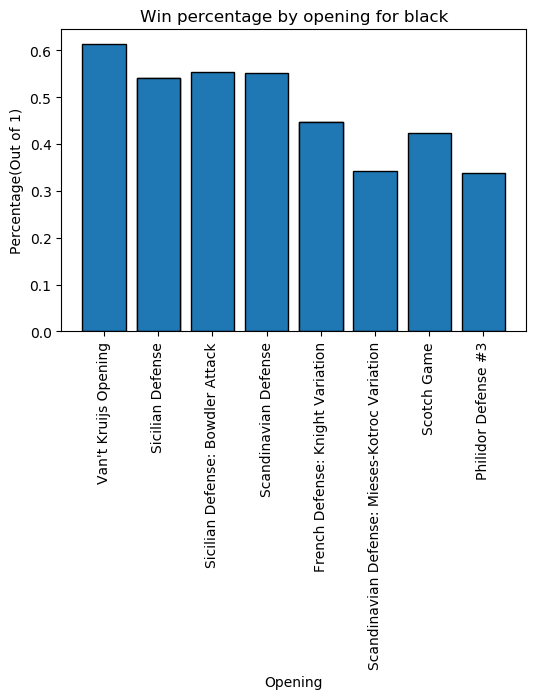

In [13]:
x = win_prob[win_prob['winner'] == 'black'].opening_name
y = win_prob[win_prob['winner'] == 'black'].percentage
plt.figure(dpi=100)
plt.bar(x, height=y, edgecolor='black')
plt.xticks(rotation='vertical')
plt.title('Win percentage by opening for black')
plt.xlabel('Opening')
plt.ylabel('Percentage(Out of 1)')

Text(0, 0.5, 'Percentage(Out of 1)')

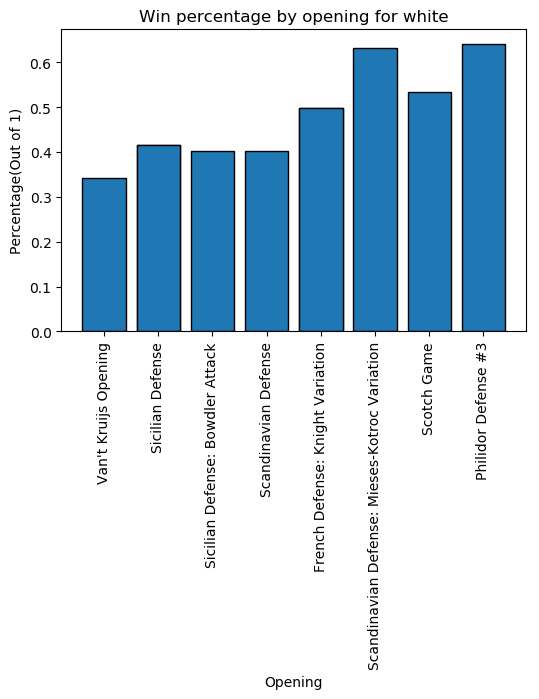

In [14]:
x = win_prob[win_prob['winner'] == 'white'].opening_name
y = win_prob[win_prob['winner'] == 'white'].percentage
plt.figure(dpi=100)
plt.bar(x, height=y, edgecolor='black')
plt.xticks(rotation='vertical')
plt.title('Win percentage by opening for white')
plt.xlabel('Opening')
plt.ylabel('Percentage(Out of 1)')

## Question 3: Who are the top players?

In [19]:
mask = ['white_id', 'white_rating']
white_player_df = df[mask]
white_player_df.columns = ['player_id', 'player_rating']
mask = ['black_id', 'black_rating']
black_player_df = df[mask]
black_player_df = black_player_df[mask]
black_player_df.columns = ['player_id', 'player_rating']
player_df = pd.concat([white_player_df, black_player_df])

In [20]:
ID = []
rating = []
for x in player_df.player_id.unique():
    ID.append(x)
    temp = player_df[player_df['player_id'] == x]
    rating.append(temp.player_rating.max())
player_df = pd.DataFrame()
player_df['player_id'] = np.array(ID)
player_df['player_rating'] = np.array(rating)


In [21]:
player_df.sort_values(by='player_rating', ascending=False).head(10)

,player_id,player_rating
6531,justicebot,2723
5201,blitzbullet,2622
488,lance5500,2621
11357,avill050,2588
4283,shahoviy_komentator,2586
7741,teatime007,2579
6215,le_truand,2549
15331,tree33,2540
13193,marantz3,2526
5906,king-bullet,2522


Text(0, 0.5, 'Player ID')

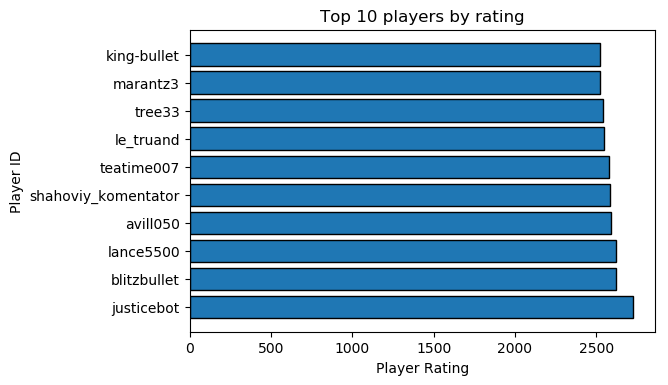

In [18]:
top_10 = player_df.sort_values(by='player_rating', ascending=False).head(10)
plt.figure(dpi=100)
plt.barh(y=top_10.player_id, width=top_10.player_rating, edgecolor='black')

plt.title('Top 10 players by rating')
plt.xlabel('Player Rating')
plt.ylabel('Player ID')

Text(0, 0.5, 'Player ID')

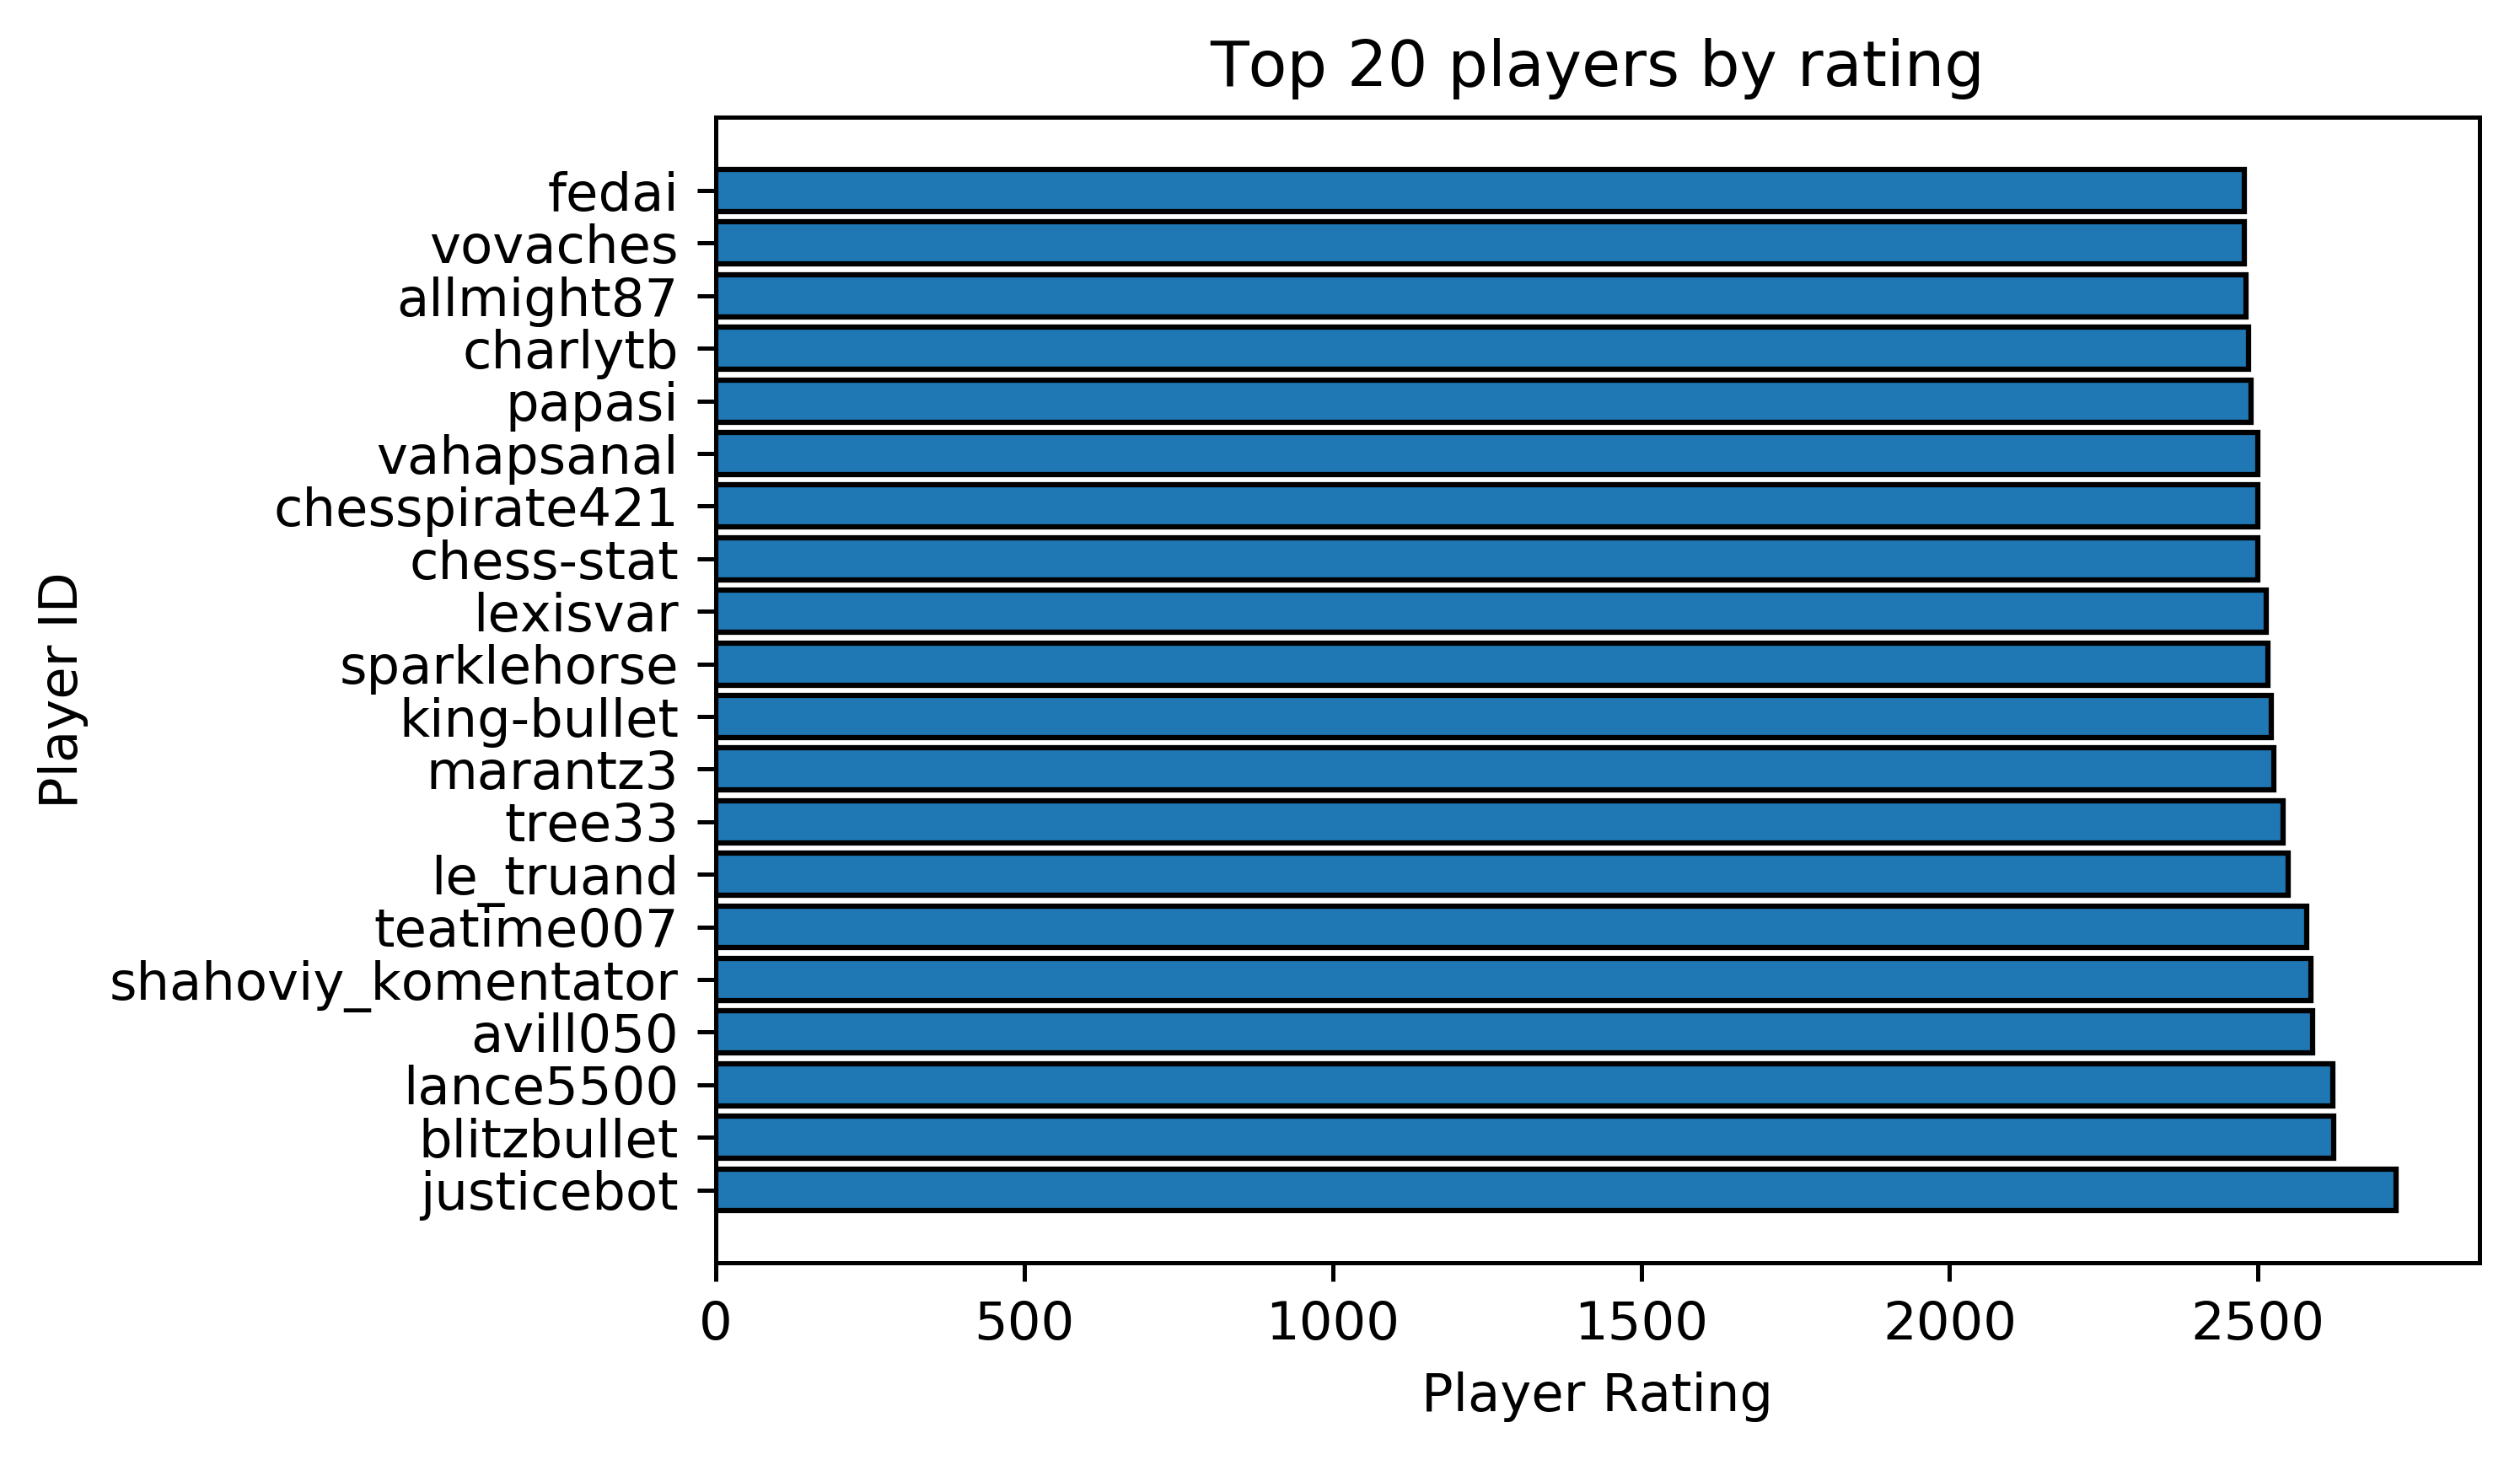

In [19]:
top_20 = player_df.sort_values(by='player_rating', ascending=False).head(20)
plt.figure(dpi=450)
plt.barh(y=top_20.player_id, width=top_20.player_rating, edgecolor='black')

plt.title('Top 20 players by rating')
plt.xlabel('Player Rating')
plt.ylabel('Player ID')

## Question 4: How are most games resolved?

In [20]:
resolve = pd.DataFrame(df.victory_status.value_counts())
resolve = resolve.reset_index()

Text(0, 0.5, 'Number of occurances')

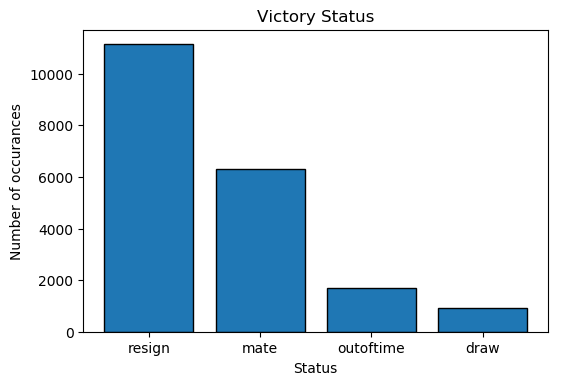

In [21]:
plt.figure(dpi=100)
plt.bar(x=resolve['index'], height=resolve.victory_status, edgecolor='black')
plt.title('Victory Status')
plt.xlabel('Status')
plt.ylabel('Number of occurances')

In [22]:
df.groupby(by='victory_status').turns.mean()

victory_status
draw         83.781457
mate         65.415020
outoftime    72.742857
resign       53.912533
Name: turns, dtype: float64

Text(0, 0.5, 'Number of turns')

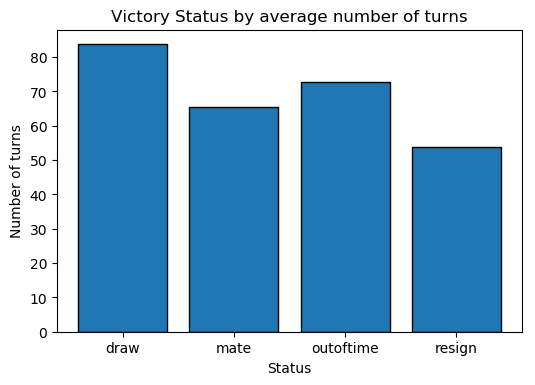

In [23]:
turn_df = df.groupby(by='victory_status').turns.mean().reset_index()
plt.figure(dpi=100)
plt.bar(x=turn_df.victory_status, height=turn_df.turns, edgecolor='black')
plt.title('Victory Status by average number of turns')
plt.xlabel('Status')
plt.ylabel('Number of turns')

## Question 5: What role does rating play in victory?

I'll take a look at this by subtracting the winner's rating from the loser's rating. A positive value indicates that the winner had a higher rating while a negative value indicates that the person with a lower ranking won. In the case of a draw, a negative rating is given since a less ranked opening forcing a draw is considered more of an achievement.

In [30]:
difference = []
for x in range(df.shape[0]):
    temp = df.iloc[x]
    if temp['winner'] == 'white':
        diff = temp.white_rating - temp.black_rating
        difference.append(diff)
    elif temp['winner'] == 'black':
        diff = temp.black_rating - temp.white_rating
        difference.append(diff)
    else:
        ratings = [temp.black_rating, temp.white_rating]
        diff = max(ratings) - min(ratings)
        difference.append(diff)
df['Difference'] = np.array(difference)
    

In [31]:
df.groupby(by='winner').Difference.mean()

winner
black     88.981113
draw     147.628421
white     95.307469
Name: Difference, dtype: float64

Text(0, 0.5, 'Number of occurances')

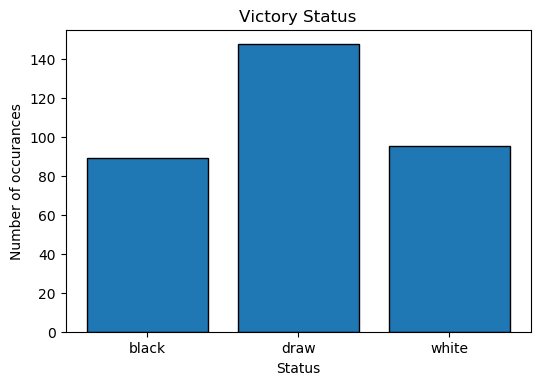

In [32]:
mean_df = df.groupby(by='winner').Difference.mean().reset_index()
plt.figure(dpi=100)
plt.bar(x=mean_df['winner'], height=mean_df.Difference, edgecolor='black')
plt.title('Victory Status')
plt.xlabel('Status')
plt.ylabel('Number of occurances')

In [26]:
df.groupby(by='winner').Difference.std()

winner
black    230.395956
draw     155.413422
white    235.626211
Name: Difference, dtype: float64

Not much of a difference overall. Let's dig in a little.

In [27]:
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,Difference
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,309
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,-61
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,-4
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,-15
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,54


## Logistic Regression

Let's see if we can fit a logistic regression to see if machine learning can predict the winner based on the ratings of black and white along with the number of moves in each opening.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
 16  Difference      20058 non-null  int64  
dtypes: bool(1), float64(2), int64(5

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

cols = ['white_rating', 'black_rating', 'opening_ply']
X = df[cols]
y = df['winner']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

/Users/nickthomas/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [30]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/Users/nickthomas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nickthomas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
lr.score(X_test, y_test)

0.6211096075778079

It's not groundbreaking but 62% accuracy based purely on ratings isn't bad. With a little reverse engineering maybe we can find out a few things.

In [32]:
lr.fit(X, y)
predict = lr.predict(X)
prob = lr.predict_proba(X)

/Users/nickthomas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nickthomas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [33]:
proba = []
for x in prob:
    proba.append(max(x))

In [34]:
df['Prediction'] = np.array(predict)
df['Probability'] = np.array(proba)

In [35]:
test = np.array([1463, 1500, 5])
test = test.reshape(1, -1)
print(lr.predict(test))
print(max(lr.predict_proba(test)[0]))
print((lr.predict_proba(test)[0]))

['black']
0.49006528291658746
[0.49006528 0.04500978 0.46492494]


# End here

## Model opening

So I would like to include opening as part of the prediction. Seeing as there are over 1,000 unique openings(below), I'll filter it to openings that have appeared in at least 50 games.

In [58]:
opening_instance = pd.DataFrame(df.opening_name.value_counts()).reset_index()
openings = list(opening_instance[opening_instance['opening_name'] >= 50]['index'])
open_df = df[df['opening_name'].isin(openings)]
open_cols = pd.get_dummies(df[df['opening_name'].isin(openings)].opening_name)
opening_df = pd.concat([open_df, open_cols], axis=1)
opening_df.shape

(9795, 103)

In [69]:
print('Games won by black with each opening')
for x in opening_df[opening_df['winner'] == 'black'].columns[19:]:
    print(x)
    print(opening_df[opening_df['winner'] == 'black'][x].sum())
print('\n')
print('Games won by white with each opening')
print('\n')
for x in opening_df[opening_df['winner'] == 'white'].columns[19:]:
    print(x)
    print(opening_df[opening_df['winner'] == 'white'][x].sum())

Games won by black with each opening
Bird Opening
43
Bird Opening: Dutch Variation
29
Bishop's Opening
51
Bishop's Opening: Berlin Defense
31
Caro-Kann Defense
83
Caro-Kann Defense: Advance Variation
29
Caro-Kann Defense: Exchange Variation
29
Center Game #2
23
Elephant Gambit
18
English Defense #2
25
English Opening: King's English Variation
39
Four Knights Game: Italian Variation
74
French Defense #2
53
French Defense: Advance Variation |  Paulsen Attack
24
French Defense: Exchange Variation
42
French Defense: Knight Variation
121
French Defense: Normal Variation
49
French Defense: Steinitz Attack
29
Giuoco Piano
56
Horwitz Defense
94
Hungarian Opening
66
Indian Game
100
Italian Game
35
Italian Game: Anti-Fried Liver Defense
73
Italian Game: Giuoco Pianissimo |  Italian Four Knights Variation
40
Italian Game: Giuoco Pianissimo |  Normal
28
Italian Game: Two Knights Defense |  Modern Bishop's Opening
27
King's Indian Attack
17
King's Knight Opening
26
King's Knight Opening: Normal Var

In [60]:
X = opening_df
X = X.drop(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'black_id', 'opening_name', 'moves', 'opening_eco', 'opening_ply',
'Prediction', 'Probability'], axis=1)
y = opening_df['winner']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

/Users/nickthomas/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

In [ ]:
lr.score(X_test, y_test)

In [ ]:
lr.fit(X, y)
predict = lr.predict(X)
prob = lr.predict_proba(X)

In [ ]:
opening_df['Prediction'] = np.array(predict)
opening_df['Probability'] = np.array(prob)